<Center><strong><h1>Programming Assigment - 2 (Pavan Kumar Mistry)</h1></strong></Center>

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import glob
from skimage import io, color, filters, exposure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


interested_classes = [
    'n02099712-Labrador_retriever',
    'n02100735-English_setter',
    'n02113799-standard_poodle',
    'n02107312-miniature_pinscher'
]

base_path = os.getcwd()
image_path = os.path.join(base_path, 'images')

### 1. Get all images of four classes

In [2]:
allImages = []
allLabes = []

for index, className in enumerate(interested_classes):
    dir = os.path.join(image_path, className)
    img = glob.glob(os.path.join(dir, "*.jpg"))
    allImages.extend(img)
    allLabes.extend([index] * len(img))

print(allImages[:10])
print(allLabes[:500])

['C:\\Users\\pavan\\OneDrive\\Desktop\\data-mining\\images\\n02099712-Labrador_retriever\\n02099712_1150.jpg', 'C:\\Users\\pavan\\OneDrive\\Desktop\\data-mining\\images\\n02099712-Labrador_retriever\\n02099712_1200.jpg', 'C:\\Users\\pavan\\OneDrive\\Desktop\\data-mining\\images\\n02099712-Labrador_retriever\\n02099712_1229.jpg', 'C:\\Users\\pavan\\OneDrive\\Desktop\\data-mining\\images\\n02099712-Labrador_retriever\\n02099712_1254.jpg', 'C:\\Users\\pavan\\OneDrive\\Desktop\\data-mining\\images\\n02099712-Labrador_retriever\\n02099712_129.jpg', 'C:\\Users\\pavan\\OneDrive\\Desktop\\data-mining\\images\\n02099712-Labrador_retriever\\n02099712_1383.jpg', 'C:\\Users\\pavan\\OneDrive\\Desktop\\data-mining\\images\\n02099712-Labrador_retriever\\n02099712_1414.jpg', 'C:\\Users\\pavan\\OneDrive\\Desktop\\data-mining\\images\\n02099712-Labrador_retriever\\n02099712_1436.jpg', 'C:\\Users\\pavan\\OneDrive\\Desktop\\data-mining\\images\\n02099712-Labrador_retriever\\n02099712_1660.jpg', 'C:\\Users

### 2. Convert the images to edge histograms.

In [3]:
def angle(dx, dy):
    return np.mod(np.arctan2(dy, dx), np.pi)

def image_to_edge_histogram(image_path):
    img = io.imread(image_path)
    
    grayscale_img = color.rgb2gray(img)
    
    dx = filters.sobel_h(grayscale_img)
    dy = filters.sobel_v(grayscale_img)

    angle_img = angle(dx, dy)

    hist, _ = exposure.histogram(angle_img, nbins=36, source_range='dtype')
    
    return hist

edge_histogram = np.array([image_to_edge_histogram(img_path) for img_path in allImages])
print(edge_histogram[:500])

[[   0    0    0 ... 3111 3253 3169]
 [   0    0    0 ... 3791 3902 3861]
 [   0    0    0 ... 3009 3106 3246]
 ...
 [   0    0    0 ... 1933 2042 2319]
 [   0    0    0 ... 2826 2873 3063]
 [   0    0    0 ... 2468 2514 2583]]


### 3. Split the dataset into a training set and a test set


In [4]:
X_train, X_test, y_train, y_test = train_test_split(edge_histogram, allLabes, test_size=0.2, stratify=allLabes)

### 4. Perform standardization on the training dataset.

In [5]:
scaler = StandardScaler().fit(X_train)

# Standardize the training dataset
X_train_standardized = scaler.transform(X_train)

print("\n::::::::::Standardized Training Data::::::::::::")
print(X_train_standardized)


::::::::::Standardized Training Data::::::::::::
[[ 0.          0.          0.         ...  1.95586702  1.9619895
   2.02442132]
 [ 0.          0.          0.         ...  0.25686316  0.23315971
   0.10625542]
 [ 0.          0.          0.         ...  0.07184547  0.03327775
   0.04983877]
 ...
 [ 0.          0.          0.         ... -0.01464654 -0.18077495
  -0.21759077]
 [ 0.          0.          0.         ...  0.00716449  0.0504318
   0.14508765]
 [ 0.          0.          0.         ...  0.02070237  0.03924438
   0.04177925]]


### 5. Perform standardization on the test dataset using the means and variances you obtained from the training dataset.

In [6]:
X_test_standardized = scaler.transform(X_test)

print("\n::::::::::Standardized Test Data:::::::::::::::")
print(X_test_standardized)


::::::::::Standardized Test Data:::::::::::::::
[[ 0.          0.          0.         ...  0.33583412  0.32415075
   0.23520775]
 [ 0.          0.          0.         ...  0.4343598   0.33906732
   0.22348481]
 [ 0.          0.          0.         ...  0.23129161  0.3651713
   0.38833864]
 ...
 [ 0.          0.          0.         ... -1.25411461 -1.31592548
  -1.35618123]
 [ 0.          0.          0.         ...  0.31026257  0.35472971
   0.42497282]
 [ 0.          0.          0.         ...  0.37795197  0.40320854
   0.38320985]]


### 6. Perform a standard 5-fold cross-validation and a stratified 5-fold cross-validation on the training set (i.e., the standardized edge histogram dataset obtained from the training set) for k-Nearest Neighbor Classifiers such that 𝑘 = 1, 3, 5, 7, 10, 20. (2.5 points)

+ Plot a graph (x-axis: k; y-axis: mean validation/training error (%)) containing four error curves (2 validation error curves and 2 training error curves - label them clearly using a legend to define the curves). Which 𝑘 has the lowest mean error for each curve? Comment about (1) the model complexity for k-Nearest Neighbor classifier in relation to 𝑘, and (2) when/whether there is overfitting/underfitting. (1.5 points)

 + Use the 𝑘 value with the lowest mean validation error for your k-Nearest Neighbor classifier from the stratified 5-fold cross-validation. What is the error for the test dataset (i.e., the standardized edge histogram dataset obtained from the test set)? (0.25 point)

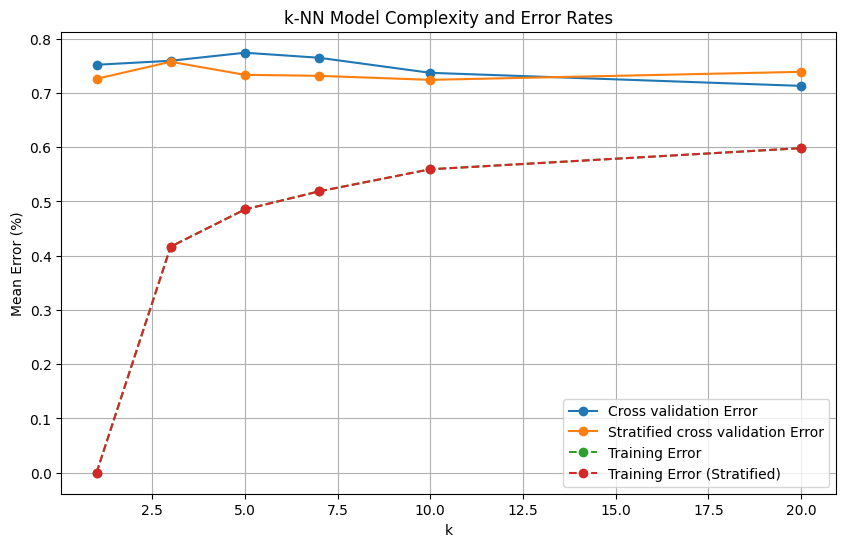

The k value with the lowest mean validation error is =>  10
Test dataset error => 65.93%

lowest mean standard CV error: 0.712962962962963 at k = 20
lowest mean stratified CV error: 0.7240740740740741 at k = 10
lowest mean training error: 0.0 at k = 1
lowest mean stratified training error (same as training error): 0.0 at k = 1


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

k_vals = [1, 3, 5, 7, 10, 20]

cv_errs = []
cv_errs_stratified = []

train_errs = []
train_errs_stratified = []

cv = StratifiedKFold(n_splits=5)

for k in k_vals:
    k_nn = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(k_nn, X_train_standardized, y_train, cv=5)
    cv_errs.append(np.mean(1 - scores))
    
    stratified_scores = cross_val_score(k_nn, X_train, y_train, cv=cv)
    cv_errs_stratified.append(np.mean(1 - stratified_scores))
    
    k_nn.fit(X_train, y_train)
    train_scores = k_nn.score(X_train, y_train)
    train_errs.append(1 - train_scores)

    train_errs_stratified.append(1 - train_scores)

plt.figure(figsize=(10, 6))

plt.plot(k_vals, cv_errs, label='Cross validation Error', marker='o')
plt.plot(k_vals, cv_errs_stratified, label='Stratified cross validation Error', marker='o')
plt.plot(k_vals, train_errs, label='Training Error', marker='o', linestyle='--')
plt.plot(k_vals, train_errs_stratified, label='Training Error (Stratified)', marker='o', linestyle='--')

plt.xlabel('k')
plt.ylabel('Mean Error (%)')
plt.title('k-NN Model Complexity and Error Rates')
plt.legend()
plt.grid(True)
plt.show()

min_error_index = np.argmin(cv_errs_stratified)
best_k = k_vals[min_error_index]

print("The k value with the lowest mean validation error is => ", best_k)

k_nn = KNeighborsClassifier(n_neighbors=best_k)
k_nn.fit(X_train_standardized, y_train)

test_scores = k_nn.score(X_test_standardized, y_test)
print(f"Test dataset error => {np.mean(1 - test_scores) * 100:.2f}%")

print()
print("lowest mean standard CV error:", min(cv_errs), "at k =", k_vals[np.argmin(cv_errs)])
print("lowest mean stratified CV error:", min(cv_errs_stratified), "at k =", k_vals[np.argmin(cv_errs_stratified)])
print("lowest mean training error:", min(train_errs), "at k =", k_vals[np.argmin(train_errs)])
print("lowest mean stratified training error (same as training error):", min(train_errs_stratified), "at k =", k_vals[np.argmin(train_errs_stratified)])


### Which k has the lowest mean error for each curve?
+ Cross validation Error: The lowest mean error is observed for k = 20
+ Stratified cross validation Error: The lowest mean error is observed for k = 10.
+ Training Error: The lowest mean error is observed for k = 1.
+ Training Error (Stratified): The lowest mean error is observed for k = 1. 
  
### Comment about
1. Note that k-Nearest Neighbor is very sensitive to the value of k, because as k grows the model becomes less sensitive to noise and outliers.
   
2. Model complexity decreases monotonically with k: as k increases, the model gets less complex since it considers more neighbours, and therefore the decision boundary is smoother. 

3. We can see an indication of overfitting at k = 1, where the training error is 0 but the validation error is higher. 

5. There is no visible sign of underfitting in the provided graph as there is no indication that the error rises with higher k values.
   
6. At k = 10, the mean error for cross-validation is at its lowest, which indicates good balance between bias and variance. 

### What is the error for the test dataset
Test dataset error =>  65.93%

### 7. Perform stratified 5-fold cross-validation on the 4-class classification problem using the three classification methods (available on canvas) assigned to you. Plot the (3) confusion matrices for using three approaches (clearly label the classes) on the test set (See Figure 1). (If you use code from any website, please do proper referencing. You will get 0 point for this assignment without proper referencing) (3.75 points)

## Decision Tree

### Reference 
+ https://scikit-learn.org/stable/modules/tree.html#classification
+ https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
+ https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
+ https://scikit-learn.org/stable/modules/cross_validation.html

In [16]:
# 1. Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

dt_classifier = DecisionTreeClassifier(max_depth = 10, random_state=42)
cv = StratifiedKFold(n_splits = 5)
dt_cv_scores = cross_val_score(dt_classifier, X_train_standardized, y_train, cv=cv)

dt_classifier.fit(X_train_standardized,  y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

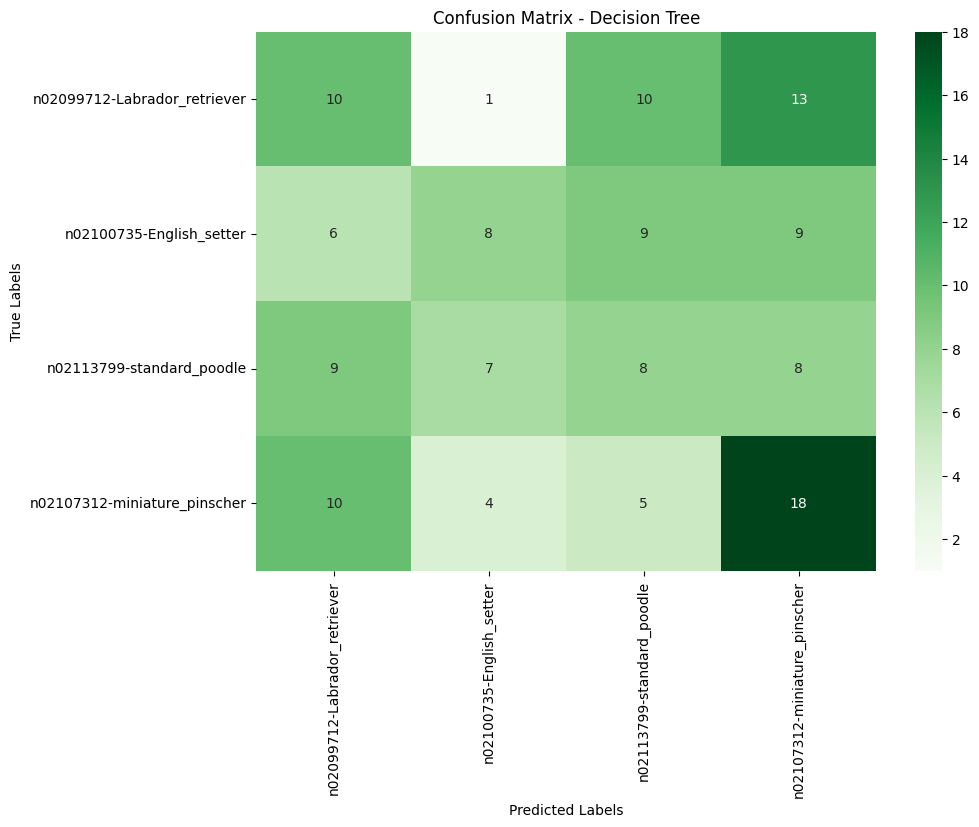

Accuracy: 0.32592592592592595
F1 Score: 0.32127270033493394



In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

dt_pred = dt_classifier.predict(X_test_standardized)
dconf_matrix = confusion_matrix(y_test, dt_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(dconf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=interested_classes, yticklabels=interested_classes)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print()

## Neural Network (MLP)

### Reference
+ https://scikit-learn.org/stable/modules/neural_networks_supervised.html
+ https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [18]:
# Neural Network (MLP)
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(hidden_layer_sizes=(10, 10, 10), random_state=42, max_iter=500, solver='adam', learning_rate_init=0.01)
mlp_cv_scores = cross_val_score(mlp_classifier, X_train_standardized, y_train, cv=cv)
mlp_classifier.fit(X_train_standardized, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), learning_rate_init=0.01,
              max_iter=500, random_state=42)

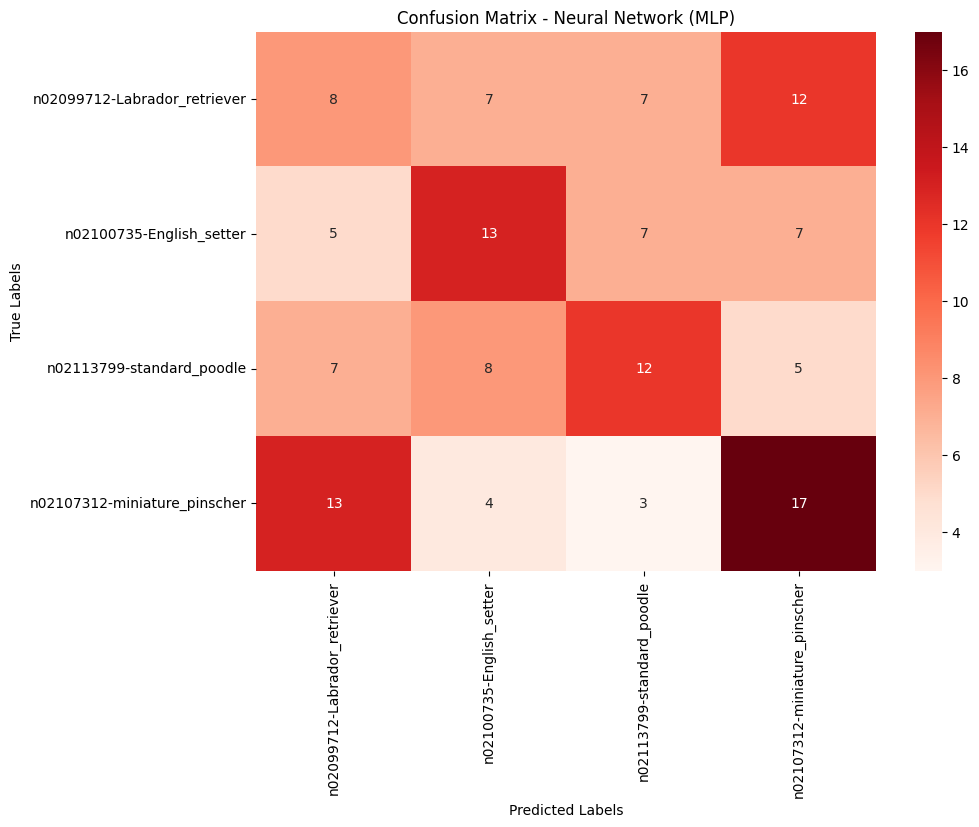

Accuracy: 0.37037037037037035
F1 Score: 0.3691686818348591



In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

mlp_pred = mlp_classifier.predict(X_test_standardized)
conf_matrix = confusion_matrix(y_test, mlp_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=interested_classes, yticklabels=interested_classes)
plt.title('Confusion Matrix - Neural Network (MLP)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, mlp_pred)
f1 = f1_score(y_test, mlp_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print()

## Adaboost Classifier

### Reference
+ https://scikit-learn.org/stable/modules/ensemble.html#adaboost
+ https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [20]:
# Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier

ab_classifier = AdaBoostClassifier(n_estimators=100, algorithm="SAMME")

ab_cv_scores = cross_val_score(ab_classifier, X_train_standardized, y_train, cv = cv)

ab_classifier.fit(X_train_standardized, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100)

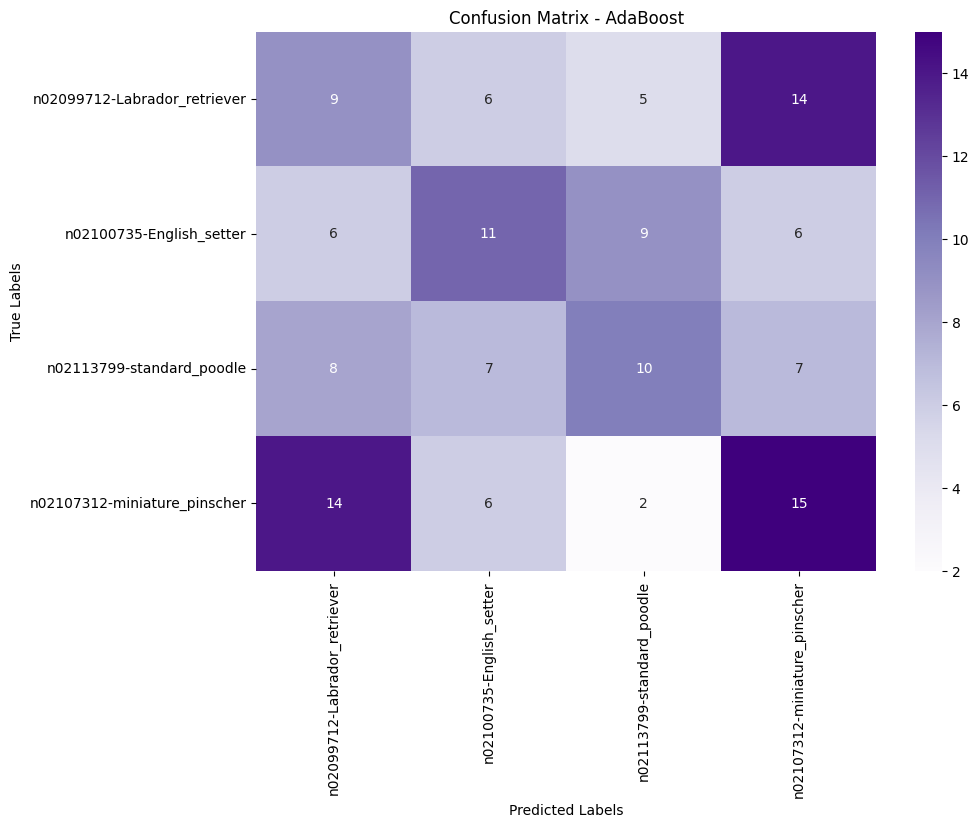

Accuracy: 0.3333333333333333
F1 Score: 0.3337753532559235



In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

ab_pred = ab_classifier.predict(X_test_standardized)
conf_matrix = confusion_matrix(y_test, ab_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=interested_classes, yticklabels=interested_classes)
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted Labels' )
plt.ylabel('True Labels')
plt.show()

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, ab_pred)
f1 = f1_score(y_test, ab_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print()

### By visually comparing (e.g., looking at the color on the diagonal values, etc.) the three matrices (on the test set), which do you think is the best method? Why? (0.50 point)

According to the Nural Network confusion matrix, most of the classes have a high number of samples 
well distributed in the diagonal and this is especially true for the English_setter and miniature_pinscher classes, 
which show better performance compared to other two method. 

### Based on the mean validation accuracies (from the 5-fold cross-validation) for the three methods. Which is the best method? (0.25 point)
The Adaboost Classifier has a highest mean validation accuracy of approx 0.290 and due to this it is the best method.

In [15]:
from sklearn.model_selection import cross_val_score

# For Decision Tree
dt_scores = cross_val_score(dt_classifier, X_train_standardized, y_train, cv=cv)
dt_mean_accuracy = np.mean(dt_scores)

# For Neural Network (MLP)
mlp_scores = cross_val_score(mlp_classifier,X_train_standardized, y_train, cv=cv)
mlp_mean_accuracy = np.mean(mlp_scores)

# For AdaBoost
ada_scores = cross_val_score(ab_classifier, X_train_standardized, y_train, cv=cv)
ada_mean_accuracy = np.mean(ada_scores)

# Print or compare the mean accuracies
print("Decision Tree mean CV accuracy:", dt_mean_accuracy)
print("Neural Network mean CV accuracy:", mlp_mean_accuracy)
print("AdaBoost mean CV accuracy:", ada_mean_accuracy)

best_method = max(dt_mean_accuracy, mlp_mean_accuracy, ada_mean_accuracy)
print("Best_method = ", best_method)


Decision Tree mean CV accuracy: 0.2425925925925926
Neural Network mean CV accuracy: 0.27222222222222225
AdaBoost mean CV accuracy: 0.29074074074074074
Best_method =  0.29074074074074074


### Compute the accuracies for the three methods on the test set. Which is the best method? (0.25 point)
The Nural Network has a highest accuracy of approx 0.3703 and due to the highest accuracy among three methods on the test set, it is the best method.

### Compute the F-measure for the three methods on the test set. Which is the best method? (0.25 point)
The Nural Network Classifier has the highest F-measure value on the test set of approx 0.369. Hence it is the best method.






### More Refernece:

#### Accuracy Score
+ https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

#### F1 score
+ https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

#### Seaborn Heatmap
+ https://seaborn.pydata.org/generated/seaborn.heatmap.html

#### Confusion Matrix
+ https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html